In [1]:
import os.path
import numpy as np
import pickle
from sklearn import metrics
import pandas as pd

# load models and target data

In [2]:
path = os.getcwd()
with open(path + '/data/RFpredval.pkl', 'rb') as file:
    RF_val = pickle.load(file)
with open(path + '/data/SVRpredval.pkl', 'rb') as file:
    SVR_val = pickle.load(file)
with open(path + '/data/REGpredval.pkl', 'rb') as file:
    REG_val = pickle.load(file)
with open(path + '/data/XGBpredval.pkl', 'rb') as file:
    XGB_val = pickle.load(file)
    
with open(path + '/data/RFpredtrain.pkl', 'rb') as file:
    RF_train = pickle.load(file)
with open(path + '/data/SVRpredtrain.pkl', 'rb') as file:
    SVR_train= pickle.load(file)
with open(path + '/data/REGpredtrain.pkl', 'rb') as file:
    REG_train = pickle.load(file)
with open(path + '/data/XGBpredtrain.pkl', 'rb') as file:
    XGB_train = pickle.load(file)
    
    
with open(path + '/data/yTrainValTest.pkl', 'rb') as file:
    y_train,y_val,y_test= pickle.load(file) 


# define bespoke evaluation metrics

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_range_percentage_error(y_true, y_pred): 
    error = np.abs((y_true- y_pred))-10000
    error[error < 0] = 0
    return np.mean(error/y_true)*100

Mean absolute error

In [10]:
#print(' SVR Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, SVR_val[0]['y_pred_svr'])))
#print(' Linear Reg Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, REG_val[0]['y_pred_reg'])))
#print(' rf Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' ')
#print(' SVR Mean Absolute Error (train) : {0:.0f}'.format( metrics.mean_absolute_error(y_train, SVR_train[0]['y_pred_svr'])))
#print(' Linear Reg Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, REG_train[0]['y_pred_reg'])))
#print(' rf Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, XGB_train[0]['y_pred_xgb'])))

# print('Mean Absolute Percentage Error: {0:.1f}'.format(mean_absolute_percentage_error(y_val, y_pred)))
# print('Mean Absolute Range Percentage Error: {0:.1f}'.format(mean_absolute_range_percentage_error(y_val, y_pred)))

 XGB Mean Absolute Error: 12301
 
 XGB Mean Absolute Error (train): 7996


Mean absolute % error

In [11]:
# print(' SVR Mean Absolute % Error: {0:.1f}'.format( mean_absolute_percentage_error(y_val, SVR_val[0]['y_pred_svr'])))
# print(' Linear Reg Mean Absolute %  Error: {0:.1f}'.format( mean_absolute_percentage_error(y_val, REG_val[0]['y_pred_reg'])))
# print(' rf Mean Absolute Error % : {0:.1f}'.format( mean_absolute_percentage_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error % : {0:.1f}'.format( mean_absolute_percentage_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' ')
# print(' SVR Mean Absolute Error %  (train) : {0:.1f}'.format( mean_absolute_percentage_error(y_train, SVR_train[0]['y_pred_svr'])))
# print(' Linear Reg Mean Absolute %  Error (train): {0:.1f}'.format( mean_absolute_percentage_error(y_train, REG_train[0]['y_pred_reg'])))
# print(' rf Mean Absolute Error % (train): {0:.1f}'.format( mean_absolute_percentage_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error % (train): {0:.1f}'.format( mean_absolute_percentage_error(y_train, XGB_train[0]['y_pred_xgb'])))

 XGB Mean Absolute Error % : 20.6
 
 XGB Mean Absolute Error % (train): 13.7


In [12]:
# print(' SVR Mean Absolute Range % Error: {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, SVR_val[0]['y_pred_svr'])))
# print(' Linear Reg Mean Absolute Range %  Error: {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, REG_val[0]['y_pred_reg'])))
# print(' rf Mean Absolute Range Error % : {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Range Error % : {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' ')
# print(' SVR Mean Absolute Range Error %  (train) : {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, SVR_train[0]['y_pred_svr'])))
# print(' Linear Reg Mean Range Absolute %  Error (train): {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, REG_train[0]['y_pred_reg'])))
# print(' rf Mean Absolute Range Error % (train): {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Range Error % (train): {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, XGB_train[0]['y_pred_xgb'])))

 XGB Mean Absolute Range Error % : 6.9
 
 XGB Mean Absolute Range Error % (train): 2.7


# Should we ensemble?
* make a dataframe of estimates from the different models
* Run a linear regression of model estimates
* Predict new target values
* evaluate new target values

In [46]:
train_pred = pd.DataFrame([y_train,SVR_train[0]['y_pred_svr'],REG_train[0]['y_pred_reg'],RF_train[0]['y_pred_rf'],XGB_train[0]['y_pred_xgb']]).T
val_pred = pd.DataFrame([y_val,SVR_val[0]['y_pred_svr'],REG_val[0]['y_pred_reg'],RF_val[0]['y_pred_rf'],XGB_val[0]['y_pred_xgb']]).T

In [47]:
from sklearn.linear_model import LinearRegression
X = train_pred[[ 'y_pred_reg',
       'y_pred_xgb']]
y = train_pred ['salary_average_euros']

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_all_pred_train = model.predict(X)
y_all_pred_val = model.predict(val_pred[[ 'y_pred_reg',
       'y_pred_xgb']])

In [49]:
print('Ensemble Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, y_all_pred_train)))
print('Ensemble Mean Absolute Error (val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, y_all_pred_val)))


print('Ensemble Mean Absolute range % Error (train): {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, y_all_pred_train)))
print('Ensemble Mean Absolute range % Error (val): {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, y_all_pred_val)))


print('R2 (train): {0:.2f}'.format( metrics.r2_score(y_train, y_all_pred_train)))
print('R2 (val): {0:.2f}'.format( metrics.r2_score(y_val, y_all_pred_val)))

Ensemble Mean Absolute Error (train): 5853
Ensemble Mean Absolute Error (val): 12271
Ensemble Mean Absolute range % Error (train): 0.9
Ensemble Mean Absolute range % Error (val): 7.5
R2 (train): 0.96
R2 (val): 0.79


# Plot predictions against true values
1. Ensemble
2. XGB

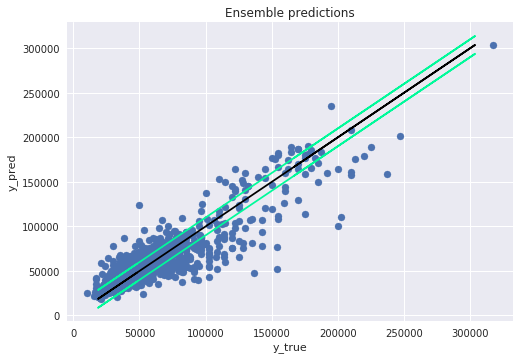

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,y_all_pred_val)
    plt.plot(y_all_pred_val,y_all_pred_val, color='black')
    plt.plot(y_all_pred_val, y_all_pred_val-10000, color='mediumspringgreen')
    plt.plot(y_all_pred_val, y_all_pred_val+10000, color='mediumspringgreen')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('Ensemble predictions')

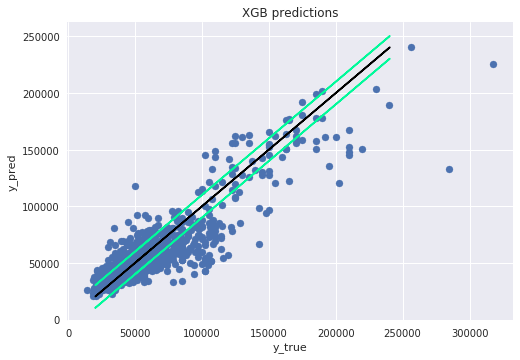

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,XGB_val[0]['y_pred_xgb'])
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb'], color='black')
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb']-10000, color='mediumspringgreen')
    plt.plot(XGB_val[0]['y_pred_xgb'], XGB_val[0]['y_pred_xgb']+10000, color='mediumspringgreen')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('XGB predictions')

# Plot Errors

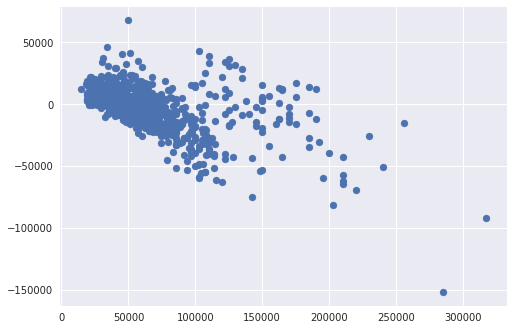

In [15]:
with plt.style.context('seaborn'):
    ax = plt.scatter(y_val,XGB_val[0]['y_pred_xgb'] - y_val)

In [10]:
with open(path + '/Pickles/xgb_model.pkl', 'rb') as file:
       xgb_model = pickle.load(file)

with open(path + '/data/x_data.pkl', 'rb') as file:
        x_train,x_val,x_test = pickle.load(file)

In [11]:
len(x_train)

3705

In [20]:
# DF, based on which importance is checked
X_importance = x_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

NameError: name 'shap' is not defined

In [8]:

import sklearn.utils.validation

In [9]:
import xgboost as xgb
import shap

ImportError: cannot import name 'parallel_helper' from 'sklearn.utils.fixes' (C:\Users\lundr\AppData\Local\Continuum\anaconda3\envs\dsj\lib\site-packages\sklearn\utils\fixes.py)

In [5]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_val)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_val.iloc[0,:])

NameError: name 'shap' is not defined